# EXPLORING CORRELATIONS BETWEEN GENERAL PROPERTIES OF LIGAND BINDING SITES

### IMPORTING NECESSARY PACKAGES

In [3]:
from fragsys_analysis import *

In [4]:
main_dir = "/Users/2394007/Documents/PHD/LOCAL/FRAGSYS_DEF/"
results_dir = os.path.join(main_dir, "results")
all_prots = pd.read_csv(os.path.join(results_dir, "all_proteins.csv"))
all_bs_ress = pd.read_csv(os.path.join(results_dir, "all_binding_site_residues_wgroup.csv"))
all_bss = pd.read_csv(os.path.join(results_dir, "all_binding_sites.csv"))

In [5]:
def get_rsa_profiles_LOC(bss_df, ress_df):
    """
    Returns a dictionary containint the binding site IDs as keys,
    and the site RSA profile as value. This is a list containing
    the RSA values of the residues forming the site.
    """
    prots = bss_df.protein.unique().tolist()
    rsa_profs = {}
    #rsa_profs_lens = []
    for prot in prots:
        prot_groups = sorted(bss_df.query('protein == @prot').group.unique().tolist())
        for group in prot_groups:
            prot_group_ress = ress_df.query('protein == @prot & group == @group')
            if len(prot_group_ress) == 0:
                print("Group {} of {} has 0 residues. Skipping!".format(group, prot))
                continue
            prot_bs_ids = sorted(bss_df.query('protein == @prot & group == @group').bs_id.unique().tolist())
            for prot_bs_id in prot_bs_ids:
                prot_bs_ress = prot_group_ress[prot_group_ress[prot_bs_id] == 1]
                prot_bs_ress = prot_bs_ress.drop_duplicates(["protein", "UniProt_ResNum", "UniProt_ResName"])
                #rsa_profs_lens.append(len(prot_bs_ress))
                if len(prot_bs_ress) == 0:
                    print("0 res at {} of group {} of {}".format(prot_bs_id, group, prot))
                    continue
                bs_rsas = prot_bs_ress.RSA.tolist()
                dk = "{}_{}_{}".format(prot, group, prot_bs_id)
                rsa_profs[dk] = sorted([round(el, 1) for el in bs_rsas])
    return rsa_profs#, rsa_profs_lens

In [34]:
print(sorted(all_bss_filt.number_bs_res.tolist()))

[2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 24, 24, 24, 25, 26, 27, 27, 28, 30, 31, 31, 

In [32]:
print(sorted([len(v) for v in rsa_profs.values()]))

[2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 24, 24, 24, 25, 26, 27, 27, 28, 30, 31, 31, 

In [30]:
print(sorted([len(v) for v in rsa_profs.values()]))

[2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 20, 20, 20, 21, 22, 22, 23, 23, 24, 24, 24, 24, 24, 25, 25, 26, 26, 26, 27, 27, 28, 28, 28, 29, 29, 30, 32, 33, 33, 34, 34, 35, 35, 35, 36, 37, 38, 41, 44, 45, 48, 48, 50, 50, 51, 51, 52, 54, 54, 56, 56, 57, 57, 60, 61, 61, 64, 65, 67, 68, 70, 72, 72, 78, 79, 79, 80, 81, 82, 85, 94, 101, 104, 107, 112, 115, 120, 123, 135, 141, 141, 144, 144, 147, 156, 156

In [37]:
print([round(el,2) for el in average_rsas])

[11.5, 16.6, 28.7, 24.35, 26.6, 39.05, 29.4, 40.85, 56.45, 38.9, 29.0, 56.2, 32.65, 38.7, 20.8, 33.7, 13.1, 24.8, 26.2, 29.95, 32.3, 33.5, 42.1, 26.8, 15.5, 42.9, 31.9, 14.8, 9.8, 24.85, 19.5, 24.4, 26.8, 16.2, 42.3, 22.1, 22.9, 36.0, 18.15, 10.2, 22.7, 20.65, 46.85, 36.6, 31.9, 31.95, 44.5, 28.7, 46.3, 23.9, 53.05, 26.25, 39.85, 59.2, 59.5, 33.55, 27.0, 26.8, 11.25, 9.7, 45.6, 22.35, 30.0, 15.5, 34.3, 33.05, 34.5, 24.4, 17.45, 16.0, 16.8, 40.25, 45.5, 12.7, 43.9, 37.6, 20.85, 58.3, 48.2, 33.45, 31.9, 19.1, 72.5, 19.95, 49.1, 23.4, 19.8, 46.2, 31.1, 66.95, 23.1, 52.55, 26.5, 34.3, 30.7, 47.3, 35.1, 24.8, 35.1, 63.75, 43.95, 30.85, 29.75, 31.7, 36.85, 75.3, 14.5, 20.2, 19.1, 62.2, 53.7, 12.2, 27.5, 36.9, 28.95, 47.7, 34.45, 49.4, 32.2, 15.75, 37.9, 21.85, 32.65, 22.3, 29.05, 4.3, 36.55, 4.6, 18.9, 26.95, 24.3, 37.8, 40.6, 22.4, 45.4, 42.05, 38.7, 49.0, 14.2, 47.5, 35.8, 33.3, 34.6, 34.0, 36.35, 17.2, 17.1, 39.9, 23.6, 42.4, 28.6, 45.2, 20.85, 29.05, 32.4, 35.15, 22.5, 30.2, 15.7, 38.7, 

In [39]:
print([round(el,2) for el in average_rsas])

[10.4, 20.6, 28.7, 24.35, 26.6, 34.9, 29.4, 33.8, 57.2, 36.3, 35.4, 56.2, 29.4, 38.7, 20.8, 33.7, 13.1, 24.6, 26.9, 26.6, 23.4, 21.1, 41.85, 26.8, 14.3, 42.9, 36.8, 17.3, 9.8, 24.85, 15.2, 13.95, 26.8, 16.2, 53.9, 22.1, 22.55, 36.0, 18.0, 9.5, 22.7, 20.65, 46.85, 36.6, 31.9, 32.6, 20.1, 28.7, 45.1, 41.0, 53.05, 26.25, 39.85, 59.2, 59.5, 33.55, 27.0, 26.8, 11.7, 9.7, 45.6, 25.2, 39.0, 13.9, 38.45, 33.05, 34.5, 24.4, 11.0, 18.9, 27.95, 40.6, 46.0, 12.7, 43.9, 37.6, 20.85, 54.95, 51.5, 26.8, 31.9, 19.1, 72.5, 19.95, 49.1, 23.4, 19.8, 47.05, 26.8, 81.0, 38.85, 38.4, 26.5, 35.75, 30.7, 47.3, 35.1, 25.5, 35.4, 63.75, 43.95, 28.7, 61.1, 31.7, 36.85, 75.3, 14.5, 20.2, 19.1, 62.2, 53.7, 12.2, 27.5, 26.45, 28.95, 47.7, 35.0, 48.8, 35.4, 15.7, 37.9, 21.85, 32.65, 28.75, 29.05, 4.4, 36.55, 4.6, 18.9, 26.95, 24.3, 43.1, 32.5, 23.1, 45.4, 42.05, 38.7, 49.0, 17.8, 47.5, 35.8, 33.3, 35.2, 34.0, 32.95, 16.0, 15.75, 39.9, 23.6, 42.4, 28.6, 45.2, 16.2, 26.1, 32.4, 35.15, 22.5, 29.7, 21.2, 38.7, 41.45, 28

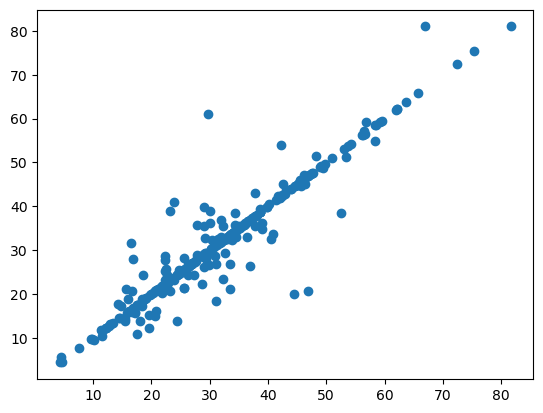

In [50]:
plt.scatter(average_rsas_un, average_rsas_all)

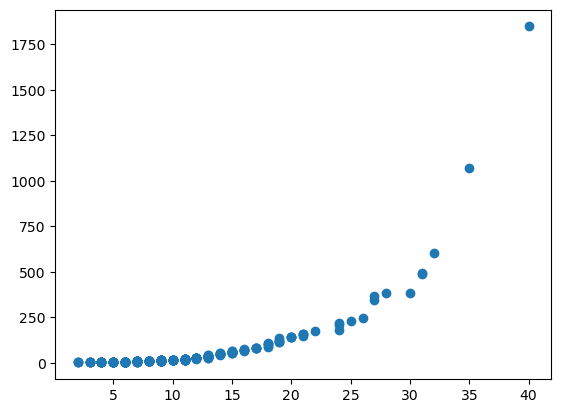

In [49]:
plt.scatter(sorted([len(v) for v in rsa_profs_un.values()]), sorted([len(v) for v in rsa_profs_all.values()]))

In [46]:
[average_rsas_all[i] - average_rsas_un[i] for i in range(len(average_rsas_all))]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [47]:
rsa_profs_all = get_rsa_profiles(all_bss, all_bs_ress)
average_rsas_all = [statistics.median(v) for v in rsa_profs_all.values()]
all_bs_ress_filt = all_bs_ress.drop_duplicates(["protein", "UniProt_ResNum", "UniProt_ResName"])

In [48]:
rsa_profs_un = get_rsa_profiles_LOC(all_bss, all_bs_ress)
average_rsas_un = [statistics.median(v) for v in rsa_profs_un.values()]
all_bs_ress_filt = all_bs_ress.drop_duplicates(["protein", "UniProt_ResNum", "UniProt_ResName"])

In [16]:
print("Number of proteins: {}".format(len(all_prots.acc.unique().tolist())))
print("Number of structures: {}".format(all_prots.n_strucs.sum()))
print("Number of ligands of interest: {}".format(all_prots.n_ligs.sum()))
print("Number of defined binding sites: {}".format(all_prots.n_bs.sum()))
print("Number of binding site residues: {}".format(len(all_bs_ress_filt)))

Number of proteins: 35
Number of structures: 1309
Number of ligands of interest: 1601
Number of defined binding sites: 292
Number of binding site residues: 2664


## PRE-PROCESSING FOR THE REGRESSION + BOX PLOTS

In [17]:
binns3 = [
    (1, 6), (6, 9), (9, 11), (11, 13),
    (13, 16), (16, 21), (21, 41)
]

In [18]:
all_bss["lab"] = all_bss.protein + "_" + all_bss.group.astype(str) + "_" + all_bss.bs_id

In [19]:
all_bss_filt = all_bss.copy()[all_bss.lab.isin(rsa_profs.keys())]
all_bss_filt.index = range(len(all_bss_filt))

In [20]:
bins_list = bin_data_points(all_bss_filt, "number_bs_res", binns3)

all_bss_filt["number_bs_res_binned"] = bins_list

all_bss_filt.number_bs_res_binned = all_bss_filt.number_bs_res_binned.astype(str)
binns3 = [str(el) for el in binns3]
un_bs_sizes = list(set(all_bss_filt.number_bs_res.tolist()))

new_x = [-0.5+0.2*(n-1) for n in un_bs_sizes]

## SITE AVERAGE RSA VS SITE SIZE

In [21]:
new_rsa_means = [statistics.mean(list(v)) for v in rsa_profs.values()]

In [22]:
X =  np.array(all_bss_filt.number_bs_res.tolist())
Y = np.array(new_rsa_means)
m, b = np.polyfit(X, Y, 1)

new_y_rsa = sorted(list(set(list(m*X+b))), reverse = True)

R = pearsonr_ci(X, Y)

r = -0.38, p = 0.0, 95% CI = [-0.47, -0.27]


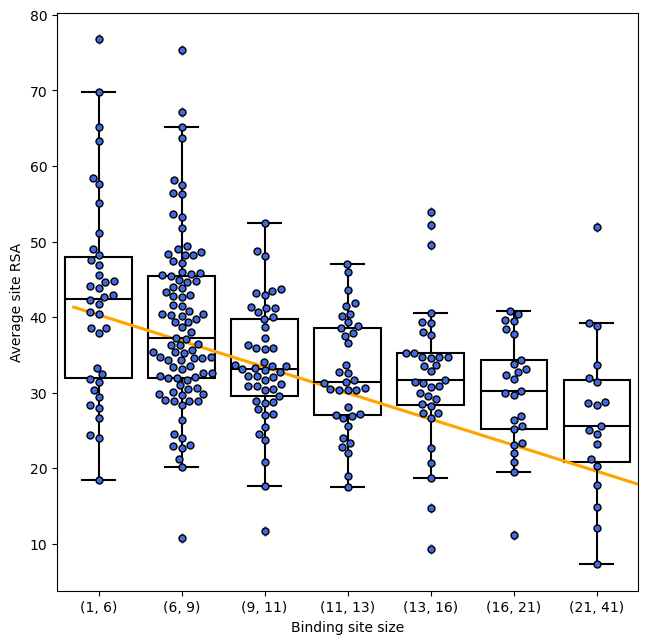

In [23]:
plot_reg_boxes(
    new_x, sorted(new_y_rsa, reverse = True),
    all_bss_filt.number_bs_res_binned, new_rsa_means, binns3,
    xlab = "Binding site size", ylab = "Average site RSA",
    f_size = (7.5, 7.5), dpi = 100, out = None, show = True)

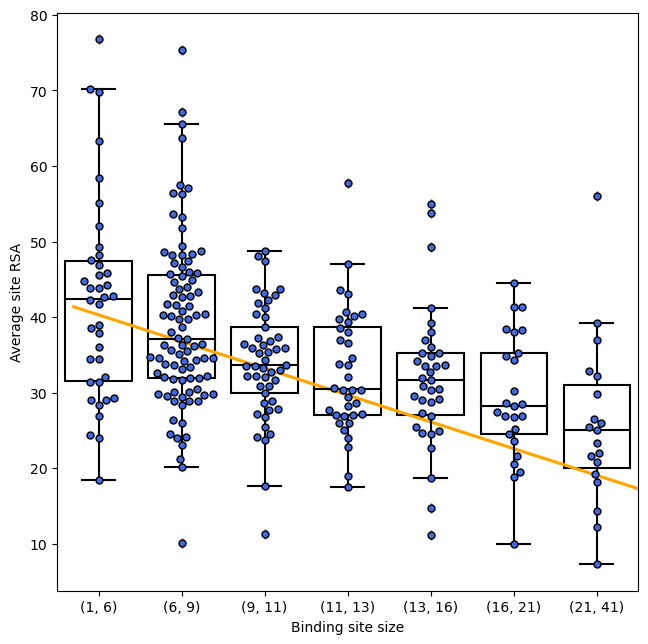

In [11]:
plot_reg_boxes(
    new_x, sorted(new_y_rsa, reverse = True),
    all_bss_filt.number_bs_res_binned, new_rsa_means, binns3,
    xlab = "Binding site size", ylab = "Average site RSA",
    f_size = (7.5, 7.5), dpi = 100, out = None, show = True)

## SITE AVERAGE DIVERGENCE VS SITE SIZE

In [12]:
reg_y_shenkin = regression_coordinates(all_bss_filt, "number_bs_res", "norm_shenkin_rel")
new_y_shenkin = sorted(list(set(list(reg_y_shenkin))), reverse = True)

R = pearsonr_ci(all_bss_filt.number_bs_res, all_bss_filt.norm_shenkin_rel)

r = -0.21, p = 0.0003, 95% CI = [-0.32, -0.1]


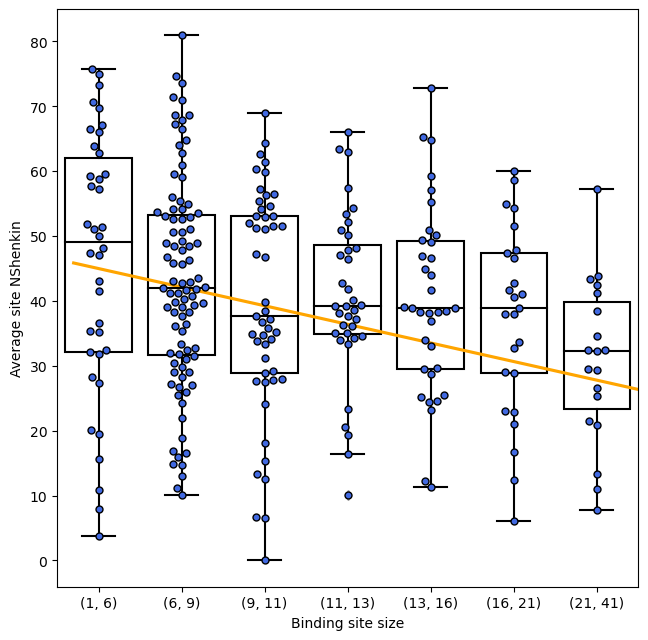

In [13]:
plot_reg_boxes(
    new_x, sorted(new_y_shenkin, reverse = True),
    all_bss_filt.number_bs_res_binned, all_bss_filt.norm_shenkin_rel, binns3,
    xlab = "Binding site size", ylab = "Average site NShenkin",
    f_size = (7.5, 7.5), dpi = 100, out = None, show = True)

## SITE AVERAGE MES VS SITE SIZE

In [14]:
reg_y_mes = regression_coordinates(all_bss_filt, "number_bs_res", "MES")
new_y_mes = sorted(list(set(list(reg_y_mes))), reverse = True)

R = pearsonr_ci(all_bss_filt.number_bs_res, all_bss_filt.MES)

r = -0.15, p = 0.0081, 95% CI = [-0.26, -0.04]


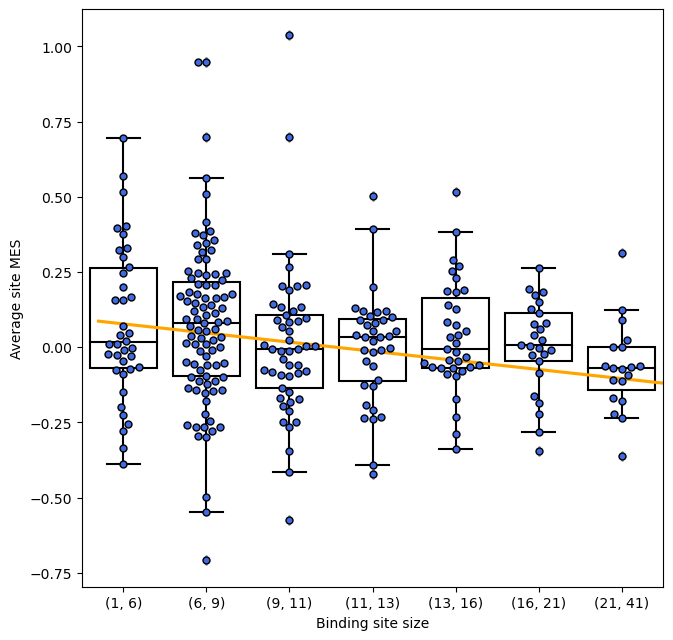

In [15]:
plot_reg_boxes(
    new_x, sorted(new_y_mes, reverse = True),
    all_bss_filt.number_bs_res_binned, all_bss_filt.MES, binns3,
    xlab = "Binding site size", ylab = "Average site MES",
    f_size = (7.5, 7.5), dpi = 100, out = None, show = True)

### NO CORRELATION BETWEEN AVERAGE SITE NSHENKIN AND MES

r = 0.0, p = 0.9545, 95% CI = [-0.11, 0.12]


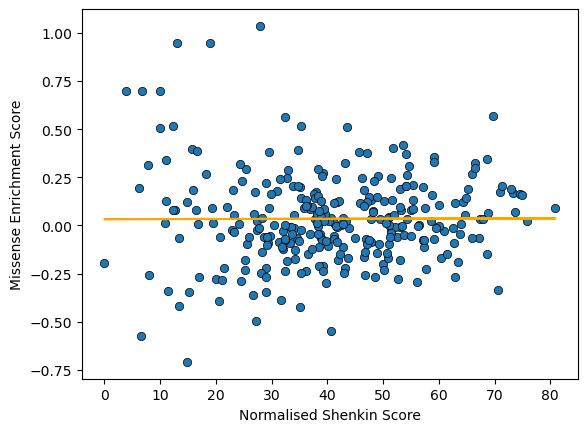

In [16]:
ezy_scatter(np.array(all_bss_filt.norm_shenkin_rel),
            np.array(all_bss_filt.MES),
            "Normalised Shenkin Score",
            "Missense Enrichment Score"
           )